In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load EMNIST ByClass
ds_train = tfds.load('emnist/byclass', split='train', as_supervised=True)
ds_test = tfds.load('emnist/byclass', split='test', as_supervised=True)


def normalize_and_orient(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.reverse(image, axis=[0])
    return image, label

ds_train = ds_train.map(normalize_and_orient).batch(64).prefetch(1)
ds_test = ds_test.map(normalize_and_orient).batch(64).prefetch(1)




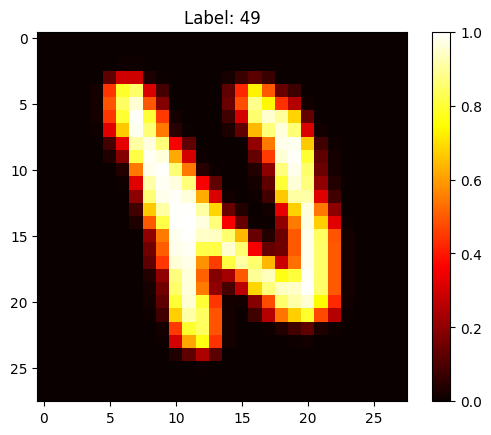

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
data_list = list(ds_train.unbatch().as_numpy_iterator())

images = [img.squeeze() for img, _ in data_list]
labels = [label for _, label in data_list]

df = pd.DataFrame({
    "label": labels,
    "image": images
})


label_50 = df.iloc[49]["label"]
img_50 = df.iloc[49]["image"]

plt.imshow(img_50, cmap="hot")
plt.title(f"Label: {label_50}")
plt.colorbar()
plt.show()

In [ ]:
import numpy as np

label_map = np.array([
    '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
    'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J',
    'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T',
    'U', 'V', 'W', 'X', 'Y', 'Z',
    'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j',
    'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't',
    'u', 'v', 'w', 'x', 'y', 'z'
])


labels = label_map[labels]

print(labels)



['5' '9' 'E' ... '6' 'l' 'C']


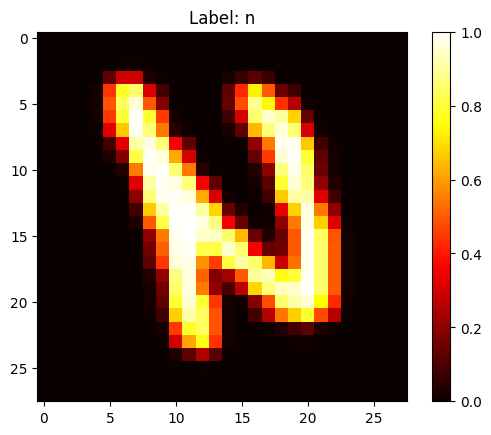

In [ ]:
df = pd.DataFrame({
    "label": labels,
    "image": images
})

label_50 = df.iloc[49]["label"]
img_50 = df.iloc[49]["image"]

plt.imshow(img_50, cmap="hot")
plt.title(f"Label: {label_50}")
plt.colorbar()
plt.show()

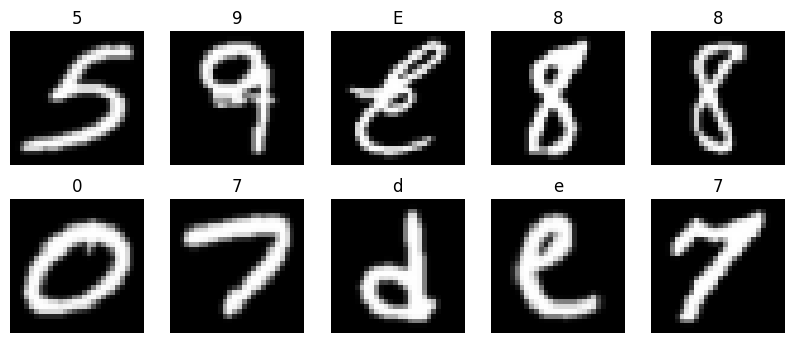

In [ ]:
def fix_emnist_image(img):
    img = np.rot90(img)
    img = np.rot90(img)
    img = np.rot90(img)
    return np.fliplr(img.T)

images_fixed = np.array([fix_emnist_image(img) for img in images])
images_fixed = np.array([np.fliplr(img) for img in images_fixed])

# Now plot
fig, axes = plt.subplots(2, 5, figsize=(10, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(images_fixed[i], cmap='gray')
    ax.set_title(labels[i])
    ax.axis('off')
plt.show()


In [ ]:
images_fixed.shape

(697932, 28, 28)

In [ ]:


np.savez_compressed(
    "emnist_preprocessed.npz",
    images_fixed=images_fixed,
    labels=labels
)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


np.savez_compressed("/content/drive/MyDrive/ML_OCR/emnist_preprocessed.npz",
                    images_fixed=images_fixed,
                    labels=labels)


Mounted at /content/drive
